<a href="https://colab.research.google.com/github/vanithakattumuri/PAMI/blob/main/notebooks/coveragePattern/basic/CPPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding Coverage patterns in Transactional Databases using CPPG

This tutorial has two parts. In the first part, we describe the basic approach to find coverage patterns in a transactional database using the CPPG algorithm. In the final part, we describe an advanced approach, where we evaluate the CPPG algorithm on a dataset at different Minimum Relative Frequency values.
***

# Prerequisites:



1.   Installing the PAMI library





In [1]:
!pip install -U pami #install the pami repository

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.0/835.0 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3313 sha256=383f8eb9e12026ae4d1e461bcca3528f059fa9e7b355efa21d15dd3179f7bf3d
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=3b427f295946228bcf24fd5e0d6e84371da336c5b571956e00a8c2bc690b3837
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir




2.   Downloading a sample dataset




In [2]:
!wget -nc https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv #download a sample transactional database

--2023-08-23 11:59:10--  https://u-aizu.ac.jp/~udayrage/datasets/transactionalDatabases/Transactional_T10I4D100K.csv
Resolving u-aizu.ac.jp (u-aizu.ac.jp)... 150.95.161.176, 150.31.244.160
Connecting to u-aizu.ac.jp (u-aizu.ac.jp)|150.95.161.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4019277 (3.8M) [text/csv]
Saving to: ‘Transactional_T10I4D100K.csv’

Transactional_T10I4 100%[===================>]   3.83M   758KB/s    in 5.4s    

2023-08-23 11:59:17 (722 KB/s) - ‘Transactional_T10I4D100K.csv’ saved [4019277/4019277]





3.   Printing few lines of a dataset to know its format.




In [3]:
!head -2 Transactional_T10I4D100K.csv

25	52	164	240	274	328	368	448	538	561	630	687	730	775	825	834
39	120	124	205	401	581	704	814	825	834


format: every row contains items seperated by a seperator.

Example:

item1 item2 item3 item4

item1 item4 item6
***

## Part 1: Finding coverage patterns using CPPG

### Step 1: Understanding the statistics of a database to choose an appropriate minimum relative frequency (minRF) value.

In [4]:
#import the class file
import PAMI.extras.dbStats.TransactionalDatabase as stats

#specify the file name
inputFile = 'Transactional_T10I4D100K.csv'

#initialize the class
obj=stats.TransactionalDatabase(inputFile,sep='\t')

#execute the class
obj.run()

#Printing each of the database statistics
print(f'Database size : {obj.getDatabaseSize()}')
print(f'Total number of items : {obj.getTotalNumberOfItems()}')
print(f'Database sparsity : {obj.getSparsity()}')
print(f'Minimum Transaction Size : {obj.getMinimumTransactionLength()}')
print(f'Average Transaction Size : {obj.getAverageTransactionLength()}')
print(f'Maximum Transaction Size : {obj.getMaximumTransactionLength()}')
print(f'Standard Deviation Transaction Size : {obj.getStandardDeviationTransactionLength()}')
print(f'Variance in Transaction Sizes : {obj.getVarianceTransactionLength()}')

#saving the distribution of items' frequencies and transactional lengths
itemFrequencies = obj.getSortedListOfItemFrequencies()
transactionLength = obj.getTransanctionalLengthDistribution()
obj.save(itemFrequencies, 'itemFrequency.csv')
obj.save(transactionLength, 'transactionSize.csv')

#Alternative apporach to print all of the database statistics and plot them
# obj.printStats()
# obj.plotGraphs()

Database size : 99935
Total number of items : 870
Database sparsity : 0.9883886940304302
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Standard Deviation Transaction Size : 3.667097909135199
Variance in Transaction Sizes : 13.447741640067324


### Step 2: Draw the item's frequency graph and transaction length's distribution graphs for more information

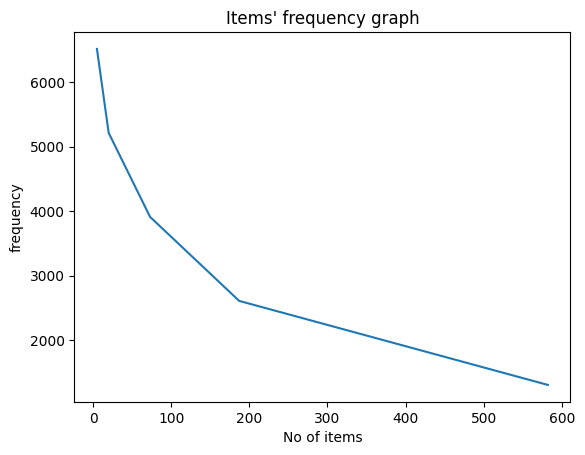

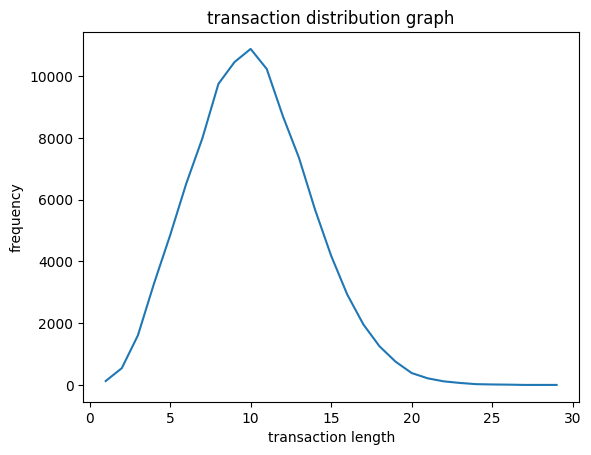

In [5]:
import PAMI.extras.graph.plotLineGraphFromDictionary as plt

itemFrequencies = obj.getFrequenciesInRange()
transactionLength = obj.getTransanctionalLengthDistribution()
plt.plotLineGraphFromDictionary(itemFrequencies, end = 100, title = 'Items\' frequency graph', xlabel = 'No of items', ylabel= 'frequency')
plt.plotLineGraphFromDictionary(transactionLength, end = 100, title = 'transaction distribution graph', xlabel = 'transaction length', ylabel = 'frequency')

### Step 3: Choosing an appropriate *minRF* value

_Observations_

  1. The input dataset is sparse as the sparsity value is 0.988 (=98.8%)
  2. Many items have low frequencies as seen in the items' frequency graph
  3. The dataset is not high dimensional as the inverted curve is around 10.

  Based on the above observations, let us choose a _minRF_ value of 0.06 (in count). We can increase or decrease the _minRF_ based on the number of patterns being generated.

In [6]:
minRF = 0.06 #minRF is specified in count. However, the users can also specify different minRF value
minCS = 0.4  #minCS is specified in count. However, the users can also specify different minCS value
maxOR = 0.8  #minOR is specified in count. However, the users can also specify different minOR value

### Step 4: Mining coverage patterns using CPPG

In [7]:
from PAMI.coveragePattern.basic import CPPG as alg #import the algorithm

obj = alg.CPPG(iFile=inputFile, minRF=minRF, minCS=minCS, maxOR = maxOR, sep='\t')    #initialize
obj.startMine()            #start the mining process

obj.save('coveragePatternsAtMinRFCount0.06.txt') #save the patterns


frequentPatternsDF= obj.getPatternsAsDataFrame() #get the generated frequent patterns as a dataframe
print('Total No of patterns: ' + str(len(frequentPatternsDF))) #print the total number of patterns
print('Runtime: ' + str(obj.getRuntime())) #measure the runtime

print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

368 [['766'], ['529'], ['529'], ['529'], ['766'], ['766'], ['529'], ['529', '829'], ['829'], ['829'], ['529'], ['529'], ['529'], ['529'], ['829'], ['766'], ['829'], ['829'], ['529'], ['766'], ['766'], ['529'], ['766'], ['829'], ['766'], ['766'], ['829'], ['529'], ['529'], ['829'], ['766'], ['529'], ['829'], ['766'], ['829'], ['766'], ['829'], ['766'], ['529'], ['766'], ['829'], ['529'], ['766'], ['829'], ['766'], ['829'], ['766'], ['529'], ['829'], ['529'], ['529'], ['766'], ['829'], ['766'], ['766'], ['829'], ['529'], ['529'], ['766'], ['829'], ['829'], ['829'], ['529'], ['529'], ['766'], ['766'], ['529'], ['529'], ['766'], ['766'], ['829'], ['529'], ['529'], ['829'], ['529'], ['766'], ['829'], ['829'], ['829'], ['529'], ['829'], ['766'], ['829'], ['766'], ['766'], ['529'], ['529'], ['829'], ['529'], ['529'], ['766'], ['829'], ['529'], ['829'], ['529', '829'], ['829'], ['529'], ['766'], ['766'], ['766'], ['766'], ['766'], ['529'], ['829'], ['766'], ['766'], ['529'], ['829'], ['829'], 

### Step 5: Investigating the generated patterns

Open the pattern's file and investigate the generated patterns. If the generated patterns were interesting, use them; otherwise, redo the Steps 3 and 4 with a different _minRF_ value.

In [8]:
!head coveragePatternsAtMinRFCount0.06.txt

368:7821 
766:6259 
529:7053 
829:6802 


The storage format is: _coveragePattern:support_
***

## Part 2: Evaluating the CPPG algorithm on a dataset at different minRF values

### Step 1: Import the libraries and specify the input parameters

In [9]:
#Import the libraries
from PAMI.coveragePattern.basic import CPPG as alg #import the algorithm
import pandas as pd

#Specify the input parameters
inputFile = 'Transactional_T10I4D100K.csv'
seperator='\t'
minimumRelativeFrequencyCountList = [0.04, 0.05, 0.06, 0.07, 0.08]
#minimumRelativeFrequency must be specified between 0 to 1. E.g., minRFList = [0.004, 0.005, 0.006, 0.007, 0.008]

### Step 2: Create a data frame to store the results of CPPG

In [10]:
result = pd.DataFrame(columns=['algorithm', 'minRF', 'minCS', 'maxOR', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of CPPG algorithm

### Step 3: Execute the algorithm at different minRF values

In [11]:
for minRFCount in minimumRelativeFrequencyCountList:
    obj = alg.CPPG(inputFile, minRF=minRFCount, minCS=minCS, maxOR=maxOR, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['CPPG', minRFCount, minCS, maxOR, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

Coverage patterns were generated successfully using CPPG algorithm 
368 [['766'], ['529'], ['529'], ['529'], ['766'], ['766'], ['529'], ['529', '829'], ['829'], ['829'], ['529'], ['529'], ['529'], ['529'], ['829'], ['766'], ['829'], ['829'], ['529'], ['766'], ['766'], ['529'], ['766'], ['829'], ['766'], ['766'], ['829'], ['529'], ['529'], ['829'], ['766'], ['529'], ['829'], ['766'], ['829'], ['766'], ['829'], ['766'], ['529'], ['766'], ['829'], ['529'], ['766'], ['829'], ['766'], ['829'], ['766'], ['529'], ['829'], ['529'], ['529'], ['766'], ['829'], ['766'], ['766'], ['829'], ['529'], ['529'], ['766'], ['829'], ['829'], ['829'], ['529'], ['529'], ['766'], ['766'], ['529'], ['529'], ['766'], ['766'], ['829'], ['529'], ['529'], ['829'], ['529'], ['766'], ['829'], ['829'], ['829'], ['529'], ['829'], ['766'], ['829'], ['766'], ['766'], ['529'], ['529'], ['829'], ['529'], ['529'], ['766'], ['829'], ['529'], ['829'], ['529', '829'], ['829'], ['529'], ['766'], ['766'], ['766'], ['766'], ['76

### Step 4: Print the result

In [12]:
print(result)

  algorithm  minRF  minCS  maxOR  patterns    runtime     memory
0      CPPG   0.04    0.4    0.8        26  10.141634  361271296
1      CPPG   0.05    0.4    0.8        10   3.483257  281358336
2      CPPG   0.06    0.4    0.8         4   1.367797  265195520
3      CPPG   0.07    0.4    0.8         2   1.340577  263102464
4      CPPG   0.08    0.4    0.8         0   1.052483  271552512


### Step 5: Visualizing the results

<Axes: xlabel='minRF'>

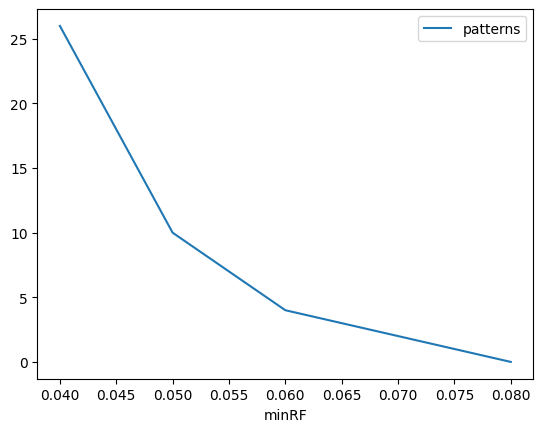

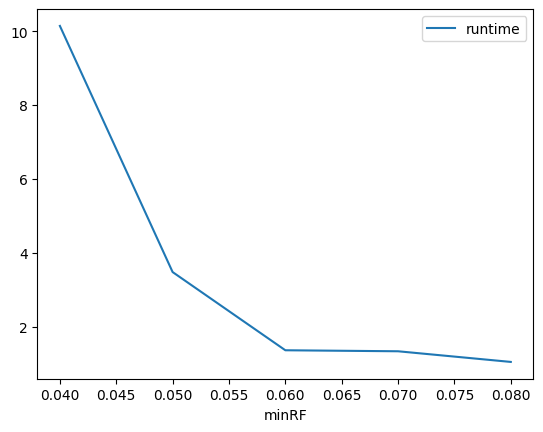

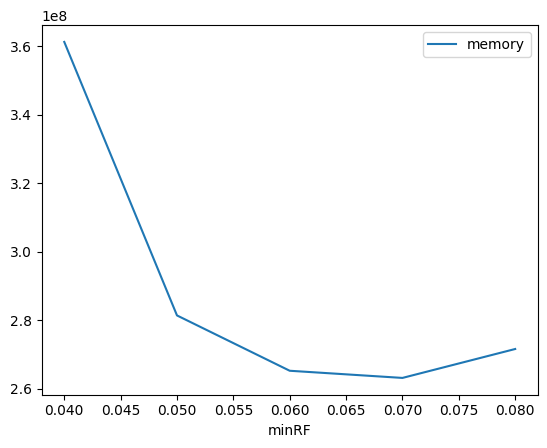

In [13]:
result.plot(x='minRF', y='patterns', kind='line')
result.plot(x='minRF', y='runtime', kind='line')
result.plot(x='minRF', y='memory', kind='line')

#Graphs can be improved further by using additional packages, such as plotly and matplotlib